In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import keras
from keras import regularizers
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table
import numpy as np
import seaborn as sns
import os
import re
import time
import pickle
from sklearn.neural_network import MLPClassifier
sns.set()

Using TensorFlow backend.


In [2]:
def reading_in_data(filename):
    
    filename = str(filename)

    infile = open(filename,'rb')
    new_dict = pickle.load(infile)
    infile.close()
    
    return new_dict

In [3]:
input_data = reading_in_data("plot_data")

In [4]:
flux = input_data['FLUX']
wave = input_data['WAVE']
labels = input_data['LABELS']
z = input_data['REDSHIFT']

print(labels[:10])

[0. 0. 1. 1. 0. 1. 0. 1. 0. 1.]


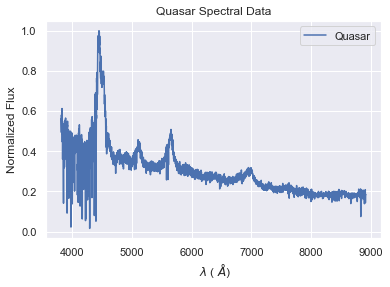

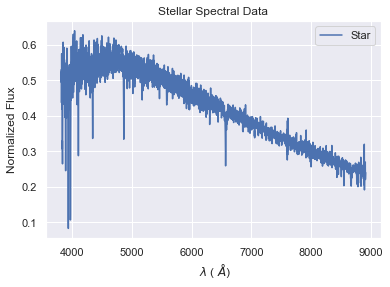

In [19]:
plt.figure()
plt.title('Quasar Spectral Data')
plt.plot(10 ** wave[0], flux[0], label = "Quasar")
plt.xlabel(" $\lambda$ ( $\AA$)")
plt.ylabel('Normalized Flux')
plt.legend()
plt.show()
#plt.plot(wave[1], flux[1], label = "Quasar")
plt.figure()
plt.title('Stellar Spectral Data')
plt.plot(10 ** wave[2], flux[2], label = "Star")
plt.xlabel(" $\lambda$ ( $\AA$)")
plt.ylabel('Normalized Flux')
plt.legend()
plt.show()

[   6   31   33   48   85  102  104  107  110  123  125  131  134  144
  147  157  192  197  206  207  211  223  238  250  256  260  268  272
  274  280  295  323  324  329  332  333  342  347  366  404  436  443
  518  520  535  539  555  560  575  589  606  610  627  636  651  652
  667  695  700  702  710  714  741  746  756  771  790  798  799  815
  828  839  842  847  879  888  896  897  901  953  974 1031 1034 1042
 1045 1075 1085 1107 1122 1128 1177 1189 1211 1225 1293 1356 1419 1424
 1486 1497]
[1. 1. 0. 0. 0. 1. 1. 1. 1. 1.]


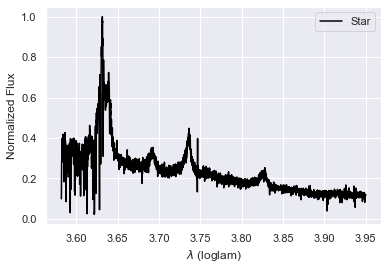

In [5]:
cut_z = (z >= 2.5) & (z <= 2.55)

cut_labels = np.where(cut_z)[0]
print((cut_labels[:100]))
print(labels[20:30])

#plt.plot(wave[655], flux[655], label = 'Star', color = 'black')
plt.plot(wave[48], flux[48], label = 'Star', color = 'black')

#plt.plot(wave[140], flux[140], label = 'Quasar', alpha = 0.6, color = 'blue')
plt.ylabel('Normalized Flux')
plt.xlabel('$\lambda$ (loglam)')
plt.legend()

In [6]:
print(flux[:10])
print(wave[:10])

print(redshift[20:30])
print(labels[20:30])

[array([0.56301564, 0.5169621 , 0.49345914, ..., 0.14337407, 0.18616399,
       0.18317693], dtype=float32), array([0.6721516 , 0.64380455, 0.6963606 , ..., 0.16601482, 0.249     ,
       0.25713137], dtype=float32), array([0.5228585 , 0.5186355 , 0.49370584, ..., 0.2201484 , 0.23336679,
       0.23976767], dtype=float32), array([0.53032607, 0.5444126 , 0.53483874, ..., 0.20987776, 0.1797699 ,
       0.18019223], dtype=float32), array([0.17671174, 0.23811924, 0.24755122, ..., 0.1614983 , 0.11937695,
       0.11314426], dtype=float32), array([0.77053237, 0.76661086, 0.72125655, ..., 0.04614904, 0.04098196,
       0.04129123], dtype=float32), array([0.364023  , 0.42696822, 0.35046026, ..., 0.10143405, 0.09618295,
       0.10807725], dtype=float32), array([0.53990996, 0.52978116, 0.5241395 , ..., 0.22737263, 0.25987476,
       0.24918948], dtype=float32), array([0.37092754, 0.4069618 , 0.3804747 , ..., 0.15163375, 0.14085051,
       0.13474013], dtype=float32), array([0.7349349 , 0.733146

NameError: name 'redshift' is not defined